In [1]:
import pandas as pd
import numpy as np

In [2]:
movies=pd.read_csv("movie.csv")
ratings=pd.read_csv("rating.csv")

In [3]:
movies.head()

,movieId,Movie,Year,Certificate,Genre,Overview,Runtime,moviePoster
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,https://upload.wikimedia.org/wikipedia/en/5/5f...
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,https://upload.wikimedia.org/wikipedia/en/9/93...
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,https://upload.wikimedia.org/wikipedia/en/f/fe...
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,https://upload.wikimedia.org/wikipedia/en/f/f1...
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,https://upload.wikimedia.org/wikipedia/en/5/58...


In [4]:
ratings.head()

,userId,movieId,Rating,No.of.Ratings
0,0,0,8.1,99114
1,1,1,8.2,71458
2,2,2,8.1,42372
3,3,3,5.4,42112
4,4,4,4.6,37211


In [5]:
final_dataset=ratings.pivot(index="movieId",columns="userId",values="Rating")
print(final_dataset)

userId   0     1     2     3     4     5     6     7     8     9     ...  \
movieId                                                              ...   
0         8.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1         NaN   8.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   8.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   5.4   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   4.6   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1395      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1396      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1397      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1398      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1399      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

userId   13

In [6]:
final_dataset.head()

userId,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
movieId,,,,,,,,,,,,,,,,,,,,,
0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_dataset.fillna(0,inplace=True)

In [8]:
final_dataset.head()

userId,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
movieId,,,,,,,,,,,,,,,,,,,,,
0,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
no_user_voted=ratings.groupby("movieId")['Rating'].agg('count')
no_movies_voted=ratings.groupby("userId")['Rating'].agg('count')

In [10]:
no_user_voted

movieId
0       1
1       1
2       1
3       1
4       1
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: Rating, Length: 1400, dtype: int64

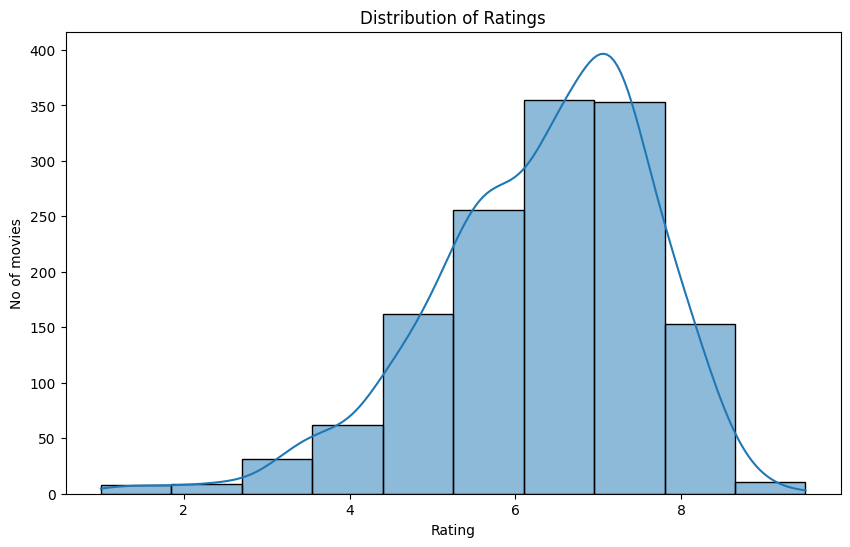

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('No of movies')
plt.show()




In [12]:
final_dataset.shape

(1400, 1400)

In [13]:
from scipy.sparse import csr_matrix
csr_data=csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
print(csr_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1400 stored elements and shape (1400, 1400)>
  Coords	Values
  (0, 0)	8.1
  (1, 1)	8.2
  (2, 2)	8.1
  (3, 3)	5.4
  (4, 4)	4.6
  (5, 5)	6.5
  (6, 6)	7.7
  (7, 7)	5.2
  (8, 8)	8.1
  (9, 9)	8.4
  (10, 10)	7.6
  (11, 11)	6.5
  (12, 12)	7.7
  (13, 13)	5.2
  (14, 14)	7.1
  (15, 15)	7.4
  (16, 16)	7.9
  (17, 17)	6.8
  (18, 18)	8.2
  (19, 19)	7.6
  (20, 20)	6.2
  (21, 21)	5.9
  (22, 22)	7.4
  (23, 23)	7.5
  (24, 24)	5.6
  :	:
  (1375, 1375)	8.6
  (1376, 1376)	8.1
  (1377, 1377)	6.1
  (1378, 1378)	4.2
  (1379, 1379)	5.4
  (1380, 1380)	4.6
  (1381, 1381)	4.5
  (1382, 1382)	4.3
  (1383, 1383)	8.9
  (1384, 1384)	8.2
  (1385, 1385)	7.0
  (1386, 1386)	6.4
  (1387, 1387)	7.1
  (1388, 1388)	7.0
  (1389, 1389)	7.8
  (1390, 1390)	7.4
  (1391, 1391)	7.4
  (1392, 1392)	4.3
  (1393, 1393)	6.5
  (1394, 1394)	4.9
  (1395, 1395)	8.6
  (1396, 1396)	6.3
  (1397, 1397)	7.8
  (1398, 1398)	5.9
  (1399, 1399)	7.3


In [14]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm= 'brute', n_neighbors = 20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [15]:
movies.head()

,movieId,Movie,Year,Certificate,Genre,Overview,Runtime,moviePoster
0,0,Bahubali: The Beginning,2015.0,UA,"Action, Drama","In ancient India, an adventurous and darin...",159,https://upload.wikimedia.org/wikipedia/en/5/5f...
1,1,Baahubali 2: The Conclusion,2017.0,UA,"Action, Drama","When Shiva, the son of Bahubali, learns ab...",167,https://upload.wikimedia.org/wikipedia/en/9/93...
2,2,1 - Nenokkadine,2014.0,UA,"Action, Thriller",A rock star must overcome his psychologica...,170,https://upload.wikimedia.org/wikipedia/en/f/fe...
3,3,Dhoom:3,2013.0,UA,"Action, Thriller","When Sahir, a circus entertainer trained i...",172,https://upload.wikimedia.org/wikipedia/en/f/f1...
4,4,Ra.One,2011.0,U,"Action, Adventure, Sci-Fi",When the titular antagonist of an action g...,156,https://upload.wikimedia.org/wikipedia/en/5/58...


In [16]:
def get_recommendation(movie_name):
    movie_list=movies[movies['Movie'].str.contains(movie_name)]
    print(movie_list)

In [17]:
get_recommendation("Arya")

    movieId   Movie    Year Certificate                               Genre  \
66       66  Arya 2  2009.0          UA          Action, Comedy               
74       74    Arya  2004.0           U  Action, Drama, Romance               

                                             Overview  Runtime  \
66      A psychotic willing to sacrifice anything ...      155   
74      Arya (Allu Arjun) is a happy-go-lucky, col...      151   

                                          moviePoster  
66  https://upload.wikimedia.org/wikipedia/en/8/82...  
74  https://upload.wikimedia.org/wikipedia/en/3/3d...  


In [18]:
def get_recommendation(movie_name):
    movie_list=movies[movies['Movie'].str.contains(movie_name)]
    if len(movie_list):
        print("Movies Found")
    else:
        print("Movie not Found..")

In [19]:
get_recommendation("Devara")

Movie not Found..


In [20]:
get_recommendation("Rebel")

Movies Found


In [21]:
def get_recommendation(movie_name):
    movie_list=movies[movies['Movie'].str.contains(movie_name)]
    print(movie_list)
    if len(movie_list):
        movie_idx=movie_list.iloc[0]['movieId']
        movie_idx=final_dataset[final_dataset['movieId']== movie_idx].index[0]
        print(movie_idx)
    else:
        print("Movie not Found..")
        

In [22]:
get_recommendation("Murari")

     movieId                    Movie    Year Certificate  \
98        98                   Murari  2001.0         NaN   
979      979  Nari Nari Naduma Murari  1989.0         NaN   

                                    Genre  \
98   Drama, Romance, Thriller               
979    Comedy, Drama, Romance               

                                              Overview  Runtime  \
98       A family is under a curse due to an old si...      180   
979      Sesha Ratnam (Sarada) is very rich and hea...      137   

                                           moviePoster  
98   https://upload.wikimedia.org/wikipedia/en/2/2b...  
979  https://upload.wikimedia.org/wikipedia/en/6/63...  
98


In [23]:
def get_recommendation(movie_name):
    movie_list=movies[movies['Movie'].str.contains(movie_name)]
    print(movie_list)
    if len(movie_list):
        movie_idx=movie_list.iloc[0]['movieId']
        movie_idx=final_dataset[final_dataset['movieId']== movie_idx].index[0]
        distance,indices=knn.kneighbors(csr_data[movie_idx],n_neighbors=11)
        rec_movies_indices=sorted(list(zip(indices.squeeze().tolist(),distance.squeeze().tolist())),key=lambda x:x[1])[:0:-1]
        recommended_movies=[]
        for val in rec_movies_indices:
            movie_idx=final_dataset.iloc[val[0]]['movieId']
            idx=movies[movies['movieId']==movie_idx].index
            recommended_movies.append({'Movie':movies.iloc[idx]['Movie'].values[0],'Distance':val[1]})
        df=pd.DataFrame(recommended_movies,index=range(1,11))
        return df
    else:
        return "Movie not Found.."

In [24]:
get_recommendation("Gabbar Singh")

     movieId                 Movie    Year Certificate  \
58        58          Gabbar Singh  2012.0          UA   
167      167  Sardaar Gabbar Singh  2016.0          UA   

                          Genre  \
58   Action, Comedy               
167  Action, Comedy               

                                              Overview  Runtime  \
58       Venkatarathnam Naidu (Pawan Kalyan), son o...      153   
167      A kingdom called Rathanpur was taken ruthl...      164   

                                           moviePoster  
58   https://upload.wikimedia.org/wikipedia/en/9/90...  
167  https://upload.wikimedia.org/wikipedia/en/d/d5...  


,Movie,Distance
1,Victory,1.0
2,Screenplay of an Indian Love Story,1.0
3,Chal Mohana Ranga,1.0
4,Andha Oru Nimidam,1.0
5,Maavichiguru,1.0
6,Sri Krishnarjuna Vijayam,1.0
7,Gudachari No.1,1.0
8,Billa Ranga,1.0
9,Vicky Dada,1.0
10,Kondura (The Sage from the Sea),1.0


In [25]:
import gradio as gr
def recommend_movies(movie_name):
    df=get_recommendation(movie_name)
    if isinstance(df,pd.DataFrame):
        return df.to_string(index=False)
    else:
        return df
app = gr.Interface(
    fn=recommend_movies,
    inputs="text",
    outputs="text",
    title="Movie Recommendation System",
    description="Enter a movie name to get a list of Recommended System"
)

app.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [45]:
import gradio as gr
import pandas as pd

# Function to retrieve movie poster URL based on movie ID
def get_movie_poster_url(movie_id, movie_poster_data):
    try:
        return movie_poster_data[movie_poster_data['movieId'] == movie_id]['moviePoster'].values[0]
    except (KeyError, IndexError):
        return None  # Handle missing poster or movie ID

# Function to recommend movies based on user input
def recommend_movies(movie_name, movie_data, rating_data, movie_poster_data):
    # Simple matching logic for recommendations
    recommended_movies = movie_data[movie_data['Movie'].str.contains(movie_name, case=False)]

    if recommended_movies.empty:
        return "No recommendations found."

    recommended_movie_ids = recommended_movies['movieId'].tolist()

    # Create HTML with movie names, ratings (optional), and images
    html = "<ul>"
    for movie_id in recommended_movie_ids:
        movie_info = movie_data[movie_data['movieId'] == movie_id]
        movie_title = movie_info['Movie'].values[0]
        movie_poster_url = get_movie_poster_url(movie_id, movie_poster_data)

        # Optionally, include average rating from rating_data
        average_rating = rating_data[rating_data['movieId'] == movie_id]['Rating'].mean()

        html += "<li>"
        if movie_poster_url:
            html += f"<img src='{movie_poster_url}' alt='{movie_title}' width='200'>"
        html += f"{movie_title}"
        if pd.notna(average_rating):  # Check if average_rating is not NaN
            html += f" ({average_rating:.1f})"
        html += "</li>"
    html += "</ul>"

    return html

# Load your movie, rating, and moviePoster data into pandas DataFrames
try:
    movie_data = pd.read_csv("movie.csv")  # Adjust to your file name
    rating_data = pd.read_csv("rating.csv")  # Adjust to your file name
    movie_poster_data = pd.read_csv("moviePoster.csv")  # Adjust to your file name
except FileNotFoundError as e:
    print(f"Error: {e}")

# Create Gradio Interface
app = gr.Interface(
    fn=recommend_movies,
    inputs=[
        gr.Textbox(placeholder="Enter a movie name"),
        gr.Dataframe(value=movie_data, label="Movie Data", visible=False),  # Hidden inputs
        gr.Dataframe(value=rating_data, label="Rating Data", visible=False),
        gr.Dataframe(value=movie_poster_data, label="Movie Poster Data", visible=False),
    ],
    outputs="html",
    title="Movie Recommendation System",
    description="Enter a movie name to get recommendations ",
    article="<p>This system recommends movies based on your input and user ratings (optional).</p>",
)

# Launch the app
app.launch()



* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.
